# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

In [266]:
#Variables que podría utilizar:
# -Metros cuadrados (Variable que mida tamaño de inmueble)
# -Lugar
# -Segmento (Estrato socioeconómico)
# -Número de baños
# -Servicios comunales (ej: piscina, canchas de fútbol, parques)
# -Acabados (ej: cocina con marmol, horno electrico)
# -Tipo de propiedad (Penthouse, departamento con terraza, casa)
# -Distancia a centros de trabajo
# -Acceso a transporte público

#Por qué? 
#Porqué son variables que tiene en cuenta los costos, desde el valor de la tierra hasta el valor de materiales
#Tambien incluyendo variables de comodidad

---

<br />
<br />

<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
#Se carga el dataset usando libreria pandas
data_properati = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

#Se imprimen 5 primeras instancias
data_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [269]:
#El dataset tiene 146660 instancias y 19 columnas
data_properati.shape

(146660, 19)

In [270]:
#Se identifican cuales son las 19 variables
data_properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [271]:
#Se identifican los valores faltantes, estos se suman para cada variable
#Se identifican los valores faltantes por cada variable
data_properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [272]:
#Otro camino para identificar valores faltantes
#data_properati.isna().sum()

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [273]:
data_properati[["property_type"]]
#data_properati.property_type

,property_type
0,Departamento
1,PH
2,PH
3,PH
4,PH
...,...
146655,Departamento
146656,Departamento
146657,Departamento
146658,Departamento


In [274]:
#Hay 10 tipos de propiedad
pd.DataFrame(data_properati.groupby("property_type").size())

,0
property_type,
Casa,21521
Casa de campo,322
Cochera,259
Departamento,107326
Depósito,265
Local comercial,325
Lote,1312
Oficina,658
Otro,374


In [275]:
#Explorar datos
#data_properati.describe()
#data_properati.sort_values('price', ascending=True)
#data_properati.sort_values('price', ascending=False)
#data_properati.sort_values('surface_total', ascending=False)
#data_properati.sort_values('surface_total')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

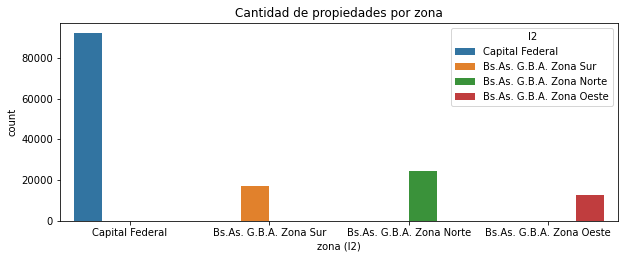

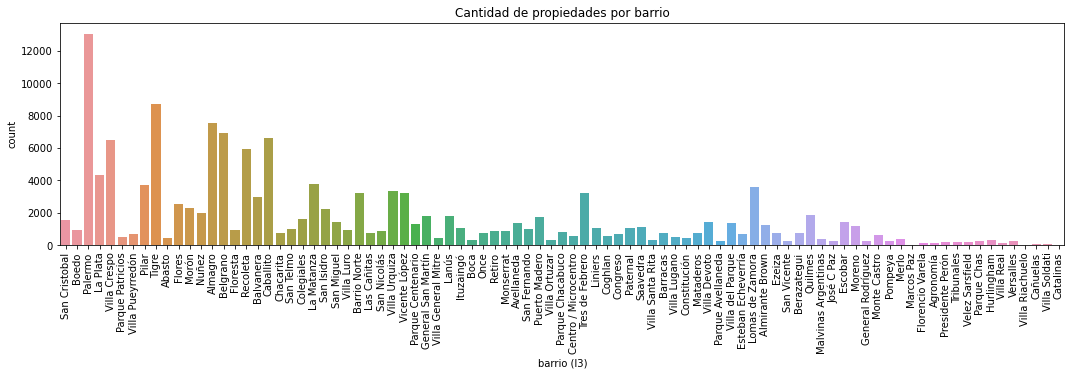

In [276]:
#Gráfico con variable l2 (zona) 
fig, ax = plt.subplots(figsize = (22, 8))
plt.subplot(221)
sns.countplot(data = data_properati, x = "l2", hue="l2")
plt.title("Cantidad de propiedades por zona")
plt.xlabel("zona (l2)")

#Gráfico con variable l3 (barrio)
fig, ax = plt.subplots(figsize = (18, 9))
plt.subplot(212)
sns.countplot(data = data_properati, x = "l3")
plt.xticks(rotation = 90)
plt.title("Cantidad de propiedades por barrio")
plt.xlabel("barrio (l3)")
plt.show()

#La mayor cantidad de publicaciones se encuentra en Capital Federal
#El barrio con más publicaciones es Palermo, seguido por Tigre

In [277]:
#Gráfico con variable l2 (zona) 
#fig, ax = plt.subplots(figsize = (9, 8))
#sns.countplot(data = data_properati, x = "l2", hue="l2")
#plt.title("Cantidad de propiedades por zona")
#plt.xlabel("zona (l2)")

In [278]:
#Gráfico con variable l3 (barrio)
#fig, ax = plt.subplots(figsize = (18, 9))
#sns.countplot(data = data_properati, x = "l3")
#plt.xticks(rotation = 90)
#plt.title("Cantidad de propiedades por barrio")
#plt.xlabel("barrio (l3)")
#plt.show()

In [279]:
#Los 5 barrios con más publicaciones de inmuebles
pd.DataFrame(data_properati.groupby("l3").size().sort_values(ascending = False).head())

,0
l3,
Palermo,13073
Tigre,8718
Almagro,7527
Belgrano,6935
Caballito,6650


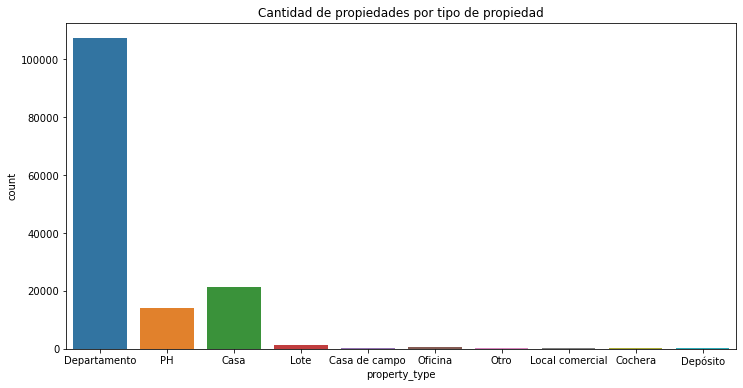

In [280]:
#Gráfico adicional por tipo de propiedad
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(data = data_properati, x = "property_type")
plt.xticks(rotation = 0)
plt.title("Cantidad de propiedades por tipo de propiedad")
plt.show()

#La mayoria de propiedades son de tipo Departamento, seguido por Casa y luego PH (porpiedad horiontal)

In [283]:
pd.DataFrame(data_properati.groupby("property_type").size().sort_values(ascending = False))

,0
property_type,
Departamento,107326
Casa,21521
PH,14298
Lote,1312
Oficina,658
Otro,374
Local comercial,325
Casa de campo,322
Depósito,265


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [284]:
#Filtro para region con más publicaciones, Capital Federal 
data_properati_1 = data_properati[(data_properati.l2 == "Capital Federal")]

#Filtro para propiedades con más publicaciones, Casa, Departamento, PH (propiedad horizontal)
data_properati_2 = data_properati_1[(data_properati_1.property_type == "Casa")
                                    | (data_properati_1.property_type == "Departamento")
                                    | (data_properati_1.property_type == "PH")]
data_properati_2.shape

(91485, 19)

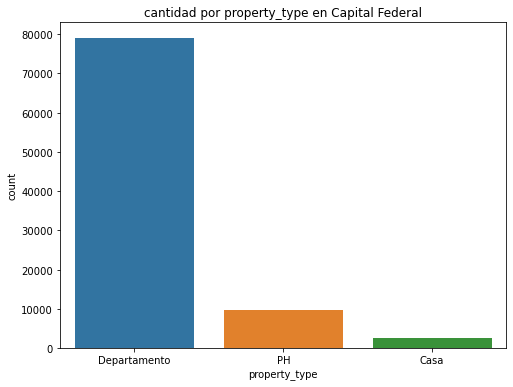

In [285]:
#Gráfico para dataset con primeros filtros
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = data_properati_2, x = "property_type")
plt.xticks(rotation = 0)
plt.title("cantidad por property_type en Capital Federal")
plt.show()

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [286]:
#A.
#Se eliminan variables de latitud y longitud
del data_properati_2["lat"]
del data_properati_2["lon"]
data_properati_2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [287]:
#Nueva cantidad de publicaciones por tipo de propiedad
pd.DataFrame(data_properati_2.groupby("property_type").size().sort_values(ascending = False))

,0
property_type,
Departamento,79029
PH,9764
Casa,2692


In [288]:
#El precio que tiene más publicaciones es US$ 125.000 (diferente al precio promedio)
pd.DataFrame(data_properati_2.groupby("price").size().sort_values(ascending = False).head())

,0
price,
125000.0,1270
120000.0,1229
115000.0,1216
110000.0,1108
145000.0,1099


In [290]:
data_properati_2["price"].mean()
#precio promedio es de US$ 259.500

259500.25823905558

<AxesSubplot:xlabel='surface_total'>

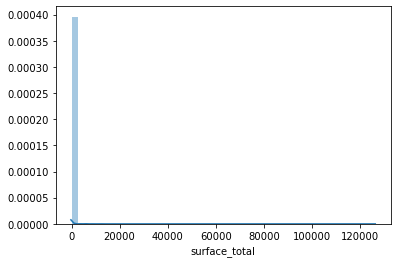

In [291]:
#B. y C.

sns.distplot(data_properati_2['surface_total'], bins = 50)

#Es mucho más probable encontrar una propiedad con cerca de 200 m2
#que encontrar una con más de 2000 m2

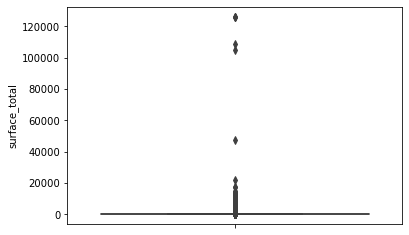

In [293]:
sns.boxplot(data = data_properati_2, y = "surface_total")
plt.show()

#Valores outliers se encuentran desde 2000 m2 en adelante
#puede que estos outliers sean errores al introducir los datos en el dataset

In [294]:
#Mascara para outliers de surface_total
data_properati_3 = data_properati_2[(data_properati_2.surface_total < 155) & (data_properati_2.surface_total > 25)]

In [296]:
data_properati_3.describe()

#Nueva descripción de datos

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,70375.000000,70375.000000,69624.000000,70375.000000,69942.000000,7.037500e+04
mean,2.728426,1.783119,1.370734,71.551119,66.666467,1.959995e+05
std,0.983622,0.839550,0.622607,30.556205,139.707405,1.705732e+05
min,1.000000,0.000000,1.000000,26.000000,1.000000,7.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,43.000000,1.190000e+05
50%,3.000000,2.000000,1.000000,65.000000,58.000000,1.650000e+05
75%,3.000000,2.000000,2.000000,90.000000,80.000000,2.390000e+05
max,21.000000,15.000000,14.000000,154.000000,13402.000000,3.243423e+07


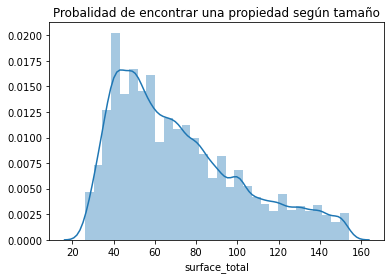

In [310]:
sns.distplot(data_properati_3['surface_total'], bins = 30)
plt.title("Probalidad de encontrar una propiedad según tamaño")
plt.show()

#Con la nueva mascara ahora se puede interpretar mejor
#con que probalidad se encuentren propiedades de diferentes tamaños
#es más probable encontrar propiedades con cerca de 40 m2
#que propiedades con cerca de 150 m2

<AxesSubplot:ylabel='surface_total'>

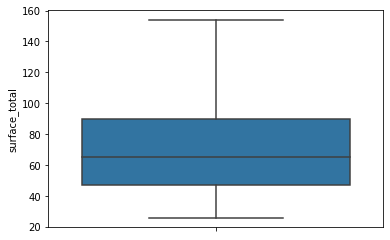

In [300]:
sns.boxplot(data = data_properati_3, y = "surface_total")

#Ya no encontramos valores outliers

In [301]:
#D.
#Mascara para que se cumpla que surface_total > surface_covered
data_properati_4 = data_properati_3[(data_properati_3.surface_total > data_properati_3.surface_covered)]

In [302]:
data_properati_4.describe()

#Nueva descripción de datos

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,48030.000000,48030.000000,47586.000000,48030.000000,48030.000000,4.803000e+04
mean,2.734832,1.792213,1.405666,74.676452,63.703935,2.041665e+05
std,0.960990,0.814262,0.631641,29.875840,25.433350,1.165125e+05
min,1.000000,0.000000,1.000000,26.000000,1.000000,1.400000e+04
25%,2.000000,1.000000,1.000000,51.000000,44.000000,1.299000e+05
50%,3.000000,2.000000,1.000000,69.000000,59.000000,1.740000e+05
75%,3.000000,2.000000,2.000000,92.000000,78.000000,2.450000e+05
max,21.000000,15.000000,12.000000,154.000000,152.000000,3.249900e+06


<AxesSubplot:xlabel='price'>

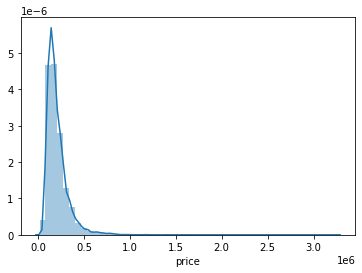

In [303]:
#E.
sns.distplot(data_properati_4['price'], bins = 50)

#Es mucho más probable encontrar una propiedad con precios cerca de US$ 14.000
#que encontrar una con precio mayor de US$ 500.000
#o que propiedades de US$ 3.000.000

<AxesSubplot:ylabel='price'>

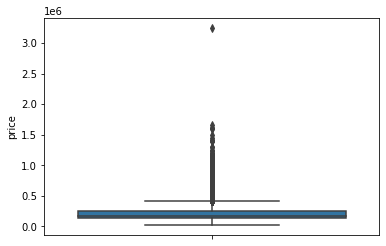

In [304]:
sns.boxplot(data = data_properati_4, y = "price")

#Valores outliers se encuentran desde US$ 500.000 en adelante
#puede que estos outliers sean errores al introducir los datos en el dataset
#o propiedades de lujo que representan casos especiales en el mercado inmobiliario

In [305]:
#Filtrar precio
data_properati_5 = data_properati_4[(data_properati_4.price < 1.500000e+05) & (0.500000e+05 < data_properati_4.price)]

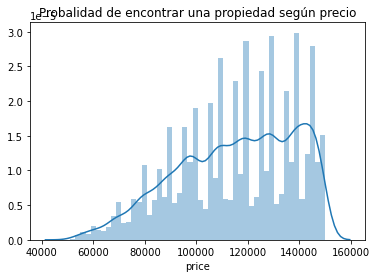

In [311]:
sns.distplot(data_properati_5['price'], bins = 50)
plt.title("Probalidad de encontrar una propiedad según precio")
plt.show()

#Con el nuevo filtro ahora se puede interpretar mejor
#con que probalidad se encuentren propiedades de diferentes precios
#es más probable encontrar propiedades con precio cercano a US$ 140.000
#que propiedades con precio cerca de US$40.000

<AxesSubplot:ylabel='price'>

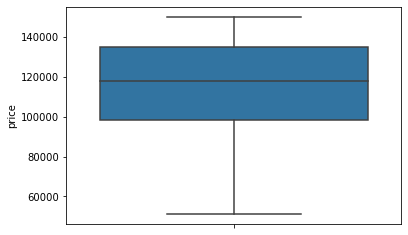

In [307]:
sns.boxplot(data = data_properati_5, y = "price")

#No encontramos valores outliers

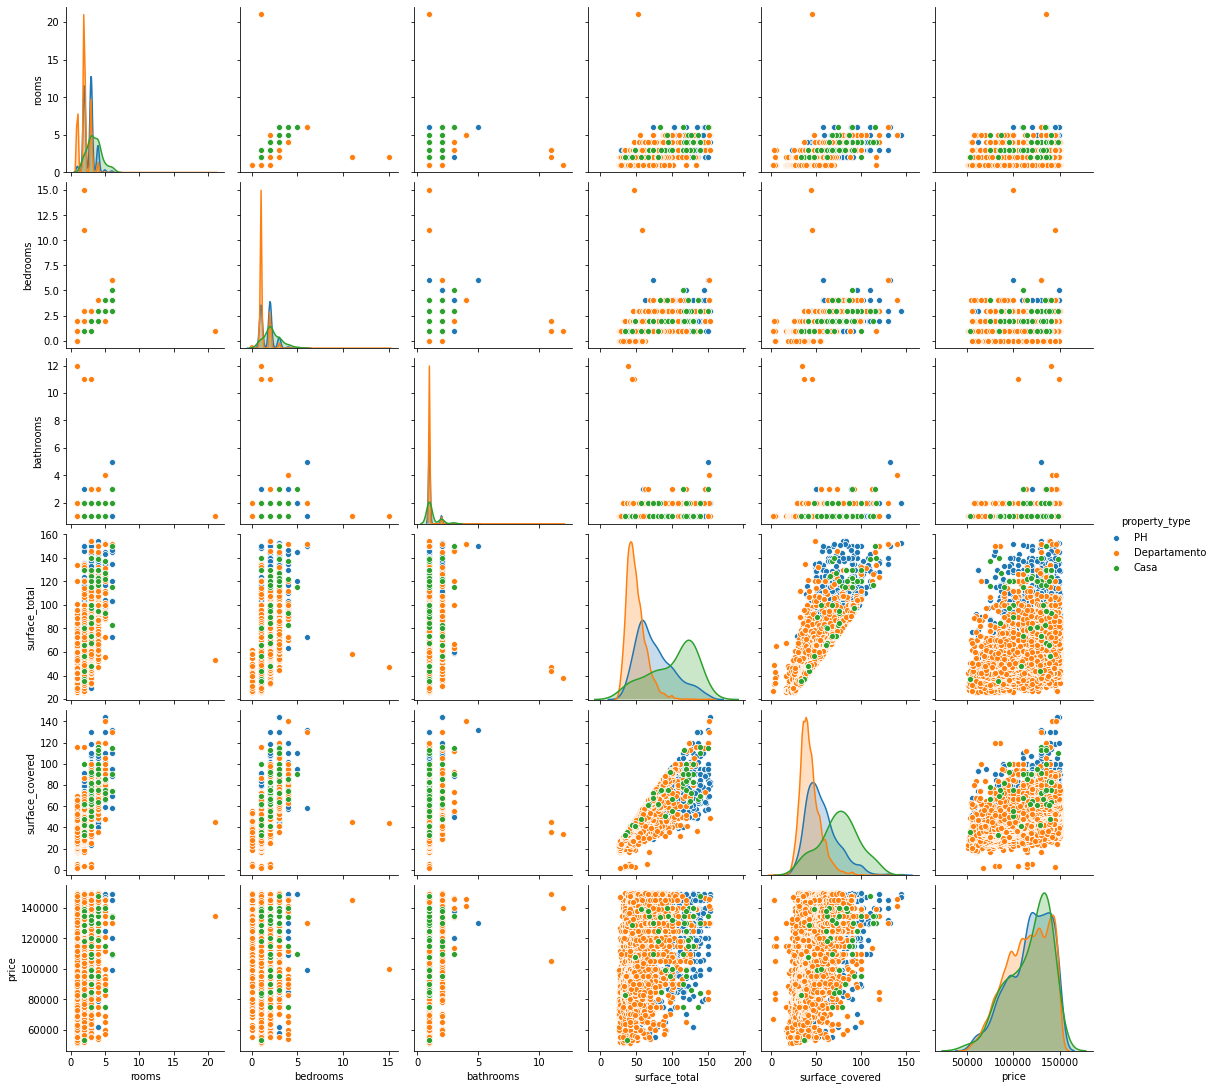

In [314]:
#F.
#Filtros para outliers de bathrooms, bedrooms, rooms
#data_properati_6 = data_properati_5[(data_properati_5.bathrooms < 10)]
#data_properati_7 = data_properati_6[(data_properati_6.bedrooms < 10)]
#data_properati_8 = data_properati_7[(data_properati_7.rooms < 20)]

sns.pairplot(data_properati_5, hue = 'property_type')

#Se realiza un pairplot para ver como se relacionan todas las variables

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [315]:
#Las variables de tamaño: surface_total y surface_covered, son las variables más correlacionadas con el precio
#Mayor tamaño representa mayores costos, por lo tanto un precio más alto

data_properati_5.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.825416,0.187955,0.643772,0.727184,0.283529
bedrooms,0.825416,1.000000,0.185427,0.608001,0.687580,0.215221
bathrooms,0.187955,0.185427,1.000000,0.211789,0.257062,0.117821
surface_total,0.643772,0.608001,0.211789,1.000000,0.853644,0.353804
surface_covered,0.727184,0.687580,0.257062,0.853644,1.000000,0.395689
price,0.283529,0.215221,0.117821,0.353804,0.395689,1.000000


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [316]:
data_properati_5.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,17752.000000,17752.000000,17550.000000,17752.000000,17752.000000,17752.000000
mean,2.115593,1.299628,1.056752,52.741381,44.672150,115286.527828
std,0.792791,0.592390,0.270227,17.619882,12.893574,22775.447359
min,1.000000,0.000000,1.000000,26.000000,2.000000,51000.000000
25%,2.000000,1.000000,1.000000,41.000000,36.000000,98493.750000
50%,2.000000,1.000000,1.000000,49.000000,42.000000,118000.000000
75%,3.000000,2.000000,1.000000,60.000000,50.000000,135000.000000
max,21.000000,15.000000,12.000000,154.000000,144.000000,149999.000000


In [317]:
data_properati_5.min()

start_date                                                2019-01-01
end_date                                                  2019-01-05
created_on                                                2019-01-01
l1                                                         Argentina
l2                                                   Capital Federal
l3                                                            Abasto
rooms                                                              1
bedrooms                                                           0
bathrooms                                                          1
surface_total                                                     26
surface_covered                                                    2
price                                                          51000
currency                                                         USD
title               1 Amb C/amenities - 41 m² - Juan B Justo 2900...
description                       

In [318]:
data_properati_5.max()

start_date                                                2020-01-25
end_date                                                  9999-12-31
created_on                                                2020-01-25
l1                                                         Argentina
l2                                                   Capital Federal
l3                                                  Villa del Parque
rooms                                                             21
bedrooms                                                          15
bathrooms                                                         12
surface_total                                                    154
surface_covered                                                  144
price                                                         149999
currency                                                         USD
title                         ÚNICOS E IMPERDIBLES 1,2,3,4 AMBIENTES
description        • MUY BUEN DEPA

In [320]:
pd.DataFrame(data_properati_5.groupby("property_type").size().sort_values(ascending = False))

,0
property_type,
Departamento,15997
PH,1701
Casa,54


In [321]:
data_properati_5.sort_values('surface_total', ascending=False).head()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
94482,2019-10-26,2019-12-14,2019-10-26,Argentina,Capital Federal,Barracas,3.0,2.0,1.0,154.0,80.0,138000.0,USD,Venta ph c/cochera y terraza prop. Barracas,Corredor Responsable: IGNACIO FEIJOO - CUCICBA...,PH,Venta
17875,2019-01-13,2019-06-17,2019-01-13,Argentina,Capital Federal,San Cristobal,3.0,2.0,1.0,154.0,49.0,139900.0,USD,VENTA 3 AMB GRAN PATIO/PARRILLA RECICLADO-SUBTE,Corredor Responsable: MARIA NATALE - CUCICBA 6...,Departamento,Venta
97631,2019-11-09,2019-12-02,2019-11-09,Argentina,Capital Federal,Paternal,4.0,2.0,1.0,154.0,83.0,130000.0,USD,Venta PH con Terraza/Quincho.Sin Expensas Pate...,Corredor Responsable: Marcelo Trujillo - CUCIC...,PH,Venta
33699,2019-12-29,2020-01-18,2019-12-29,Argentina,Capital Federal,Floresta,5.0,3.0,2.0,153.0,144.0,147000.0,USD,PH en VENTA FLORESTA 5 Ambientes c/patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta
94198,2020-01-17,9999-12-31,2020-01-17,Argentina,Capital Federal,Floresta,5.0,3.0,2.0,153.0,144.0,147000.0,USD,PH en VENTA FLORESTA 5 Ambientes c/patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta


In [322]:
data_properati_5.sort_values('surface_total', ascending=True).head()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
133578,2019-09-14,2019-09-17,2019-09-14,Argentina,Capital Federal,Tribunales,1.0,1.0,1.0,26.0,23.0,59500.0,USD,"Sarmiento y talcahuano, luminoso monoambiente",Venta de Departamento 1 AMBIENTE en Tribunales...,Departamento,Venta
46511,2019-02-27,2019-03-01,2019-02-27,Argentina,Capital Federal,Belgrano,1.0,0.0,1.0,26.0,23.0,78700.0,USD,DEPARTAMENTO EN VENTA,Xintel (CRE-CRE-5656) PREVENTA EN POZO: Estudi...,Departamento,Venta
2993,2019-08-18,2020-03-01,2019-08-18,Argentina,Capital Federal,San Cristobal,1.0,1.0,1.0,26.0,24.0,60000.0,USD,Av. Independencia 2282 - Monoambiente en VENTA,Corredor Responsable: Raul Hector Merlo - CUCI...,Departamento,Venta
135228,2019-07-31,2019-08-13,2019-07-31,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,26.0,22.0,99000.0,USD,Monoambiente con Balcón - Libertador y Ugarte,Impecable monoambiente ubicado en un 5to piso ...,Departamento,Venta
135227,2019-07-31,2019-08-13,2019-07-31,Argentina,Capital Federal,Nuñez,1.0,1.0,1.0,26.0,22.0,99000.0,USD,Hermoso Monoambiente con Balcon - Libertador y...,Impecable monoambiente ubicado en un 5to piso ...,Departamento,Venta


In [323]:
data_properati_5.sort_values('price', ascending=False).head()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
106352,2019-09-12,2019-09-14,2019-09-12,Argentina,Capital Federal,Villa Urquiza,2.0,1.0,1.0,41.0,37.0,149999.0,USD,IMPECABLE SEMIPISO AL FRENTE !,Corredor Responsable: Fernando Muñoz - CUCICBA...,Departamento,Venta
138198,2019-07-31,2019-08-14,2019-07-31,Argentina,Capital Federal,Caballito,3.0,3.0,1.0,63.0,58.0,149999.0,USD,Departamento 3 ambientes c/balcón Excelente ...,A media cuadra de Avenida La Plata nos encontr...,Departamento,Venta
49862,2019-01-07,2019-07-10,2019-01-07,Argentina,Capital Federal,Monte Castro,3.0,2.0,1.0,70.0,65.0,149999.0,USD,DEPARTAMENTO EN VENTA,Xintel (CRY-CRY-58) Venta de Departamento 3 AM...,Departamento,Venta
95064,2019-08-25,2019-09-04,2019-08-25,Argentina,Capital Federal,San Telmo,2.0,1.0,2.0,59.0,54.0,149999.0,USD,Dos ambientes + Cochera a estrenar en San Telmo,La zona habla por si sola: en el corazón de Sa...,Departamento,Venta
51432,2019-03-24,2019-09-14,2019-03-24,Argentina,Capital Federal,Parque Chas,2.0,1.0,1.0,65.0,47.0,149999.0,USD,Parque Chas 2 Ambientes Bauness 1266,Corredor Responsable: Daniel Acosta - CUCICBA ...,Departamento,Venta


In [324]:
data_properati_5.sort_values('price', ascending=True).head()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
12217,2019-01-21,2019-08-31,2019-01-21,Argentina,Capital Federal,Once,1.0,1.0,1.0,42.0,21.0,51000.0,USD,Venat departamento en Once,Departamento de 42 m2 en Once al contrafrente;...,Departamento,Venta
67052,2019-11-07,2019-12-20,2019-11-07,Argentina,Capital Federal,San Cristobal,1.0,1.0,1.0,31.0,23.0,51000.0,USD,PREVENTA DEPARTAMENTO DE POZO HUMBERTO PRIMO 2300,Corredor Responsable: Martin Macagno - CUCICBA...,Departamento,Venta
66375,2019-07-26,2019-08-17,2019-07-26,Argentina,Capital Federal,Balvanera,2.0,1.0,1.0,28.0,27.0,52000.0,USD,Venta Dpto 2 ambientes 2do piso por escalera.,Corredor Responsable: Mauro Marvisi - CUCICBA ...,Departamento,Venta
94839,2019-08-25,2019-09-04,2019-08-25,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,31.0,28.0,52000.0,USD,Excelente Ambiente Divisible en Venta en Balva...,Gran Ambiente 8 x 3; Lavadero/Balcón Lateral;C...,Departamento,Venta
54576,2019-11-14,9999-12-31,2019-11-14,Argentina,Capital Federal,Boca,1.0,1.0,1.0,34.0,31.0,52000.0,USD,VENTA MONO AMBIENTE CABA LA BOCA,Corredor Responsable: CARLOS ALARCON - CPI 505...,Departamento,Venta


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [4]:
#1.
data_properati = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

data_properati_1 = data_properati[(data_properati.l2 == "Capital Federal")]
data_properati_2 = data_properati_1[(data_properati_1.property_type == "Departamento") 
                                    | (data_properati_1.property_type == "PH") 
                                    | (data_properati_1.property_type == "Casa")]
data_properati_3 = data_properati_2[(data_properati_2.surface_total <= 1000) 
                                    & (15 <= data_properati_2.surface_total)]
data_properati_4 = data_properati_3[(data_properati_3.price <= 4000000)]
data_properati_5 = data_properati_4[["rooms", "bedrooms", "bathrooms", "surface_total",
                                     "surface_covered", "price", "property_type"]]
data_properati_final = data_properati_5.dropna()

data_properati_final.shape

#Se incluye una variable, property_type, para modelos de clasificación adicionales (séptima columna)
#MODELOS 3 y 4 (adicionales a la actividad propuesta)
#donde la variable respuesta es property_type, para proponer un modelos de clasificación extra

(81019, 7)

In [326]:
#MODELO 1 PROYECTO
#Regresión con una variable X

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [327]:
#Se define la variable de control X como surface_total
X = data_properati_final[['surface_total']]
X.columns

Index(['surface_total'], dtype='object')

In [328]:
#La variable respuesta es el precio, price
y = data_properati_final['price']
y

0          153000.0
1          159000.0
2          125000.0
3          295000.0
5          150000.0
            ...    
146554     570000.0
146555     480000.0
146556     530000.0
146557     420000.0
146558    1470000.0
Name: price, Length: 81019, dtype: float64

In [329]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [330]:
#Se entrenan los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [331]:
print(linear_model.coef_, linear_model.intercept_) 
#Un aumento de 1 m2 aumenta 2630 dolares el precio de la propiedad 

[2630.4146957] 13037.407671383087


<ipython-input-332-ae385e088413>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


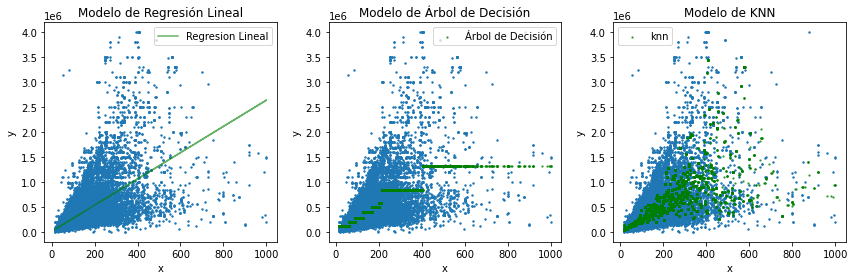

In [332]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g', alpha = 0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Modelo de Regresión Lineal")

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.scatter(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g', alpha = 0.6, s = 2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Modelo de Árbol de Decisión")

plt.subplot(1,3,3)
plt.scatter(X,y, s = 2)
plt.scatter(X,knn_regressor.predict(X),label ='knn', c = 'g', alpha = 0.6, s = 2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Modelo de KNN")

plt.tight_layout()
plt.show()

#Descripción:

#MODELO DE REGRESIÓN LINEAL
#Es un modelo predictivo que busca explicar la variable cuantitativa price
#a partir de la variable explicativa surface_total
#la recta color verde representa la predicción de precio que hace el modelo
#con los datos recolectados en la base de properati (puntos azules)
#Esta gráfica nos dice que a mayor tamaño de un inmueble, mayor su precio

#MODELO DE ÁRBOL DE DECISIÓN
#El árbol de regresión hace preguntas para cada una de las covariables, surface_total en este caso
#se busca una covariable que permita predecir mejor la variable respuesta, price
#se encuentra un punto de corte para la covarible
#punto de corte que permita predecir de mejor manera el precio
#en el gráfico se evidencia un valor promedio para rangos de tamaño
#Esta gráfica nos dice que a mayor tamaño de un inmueble, mayor su precio
#a partir de los rangos definidos

#MODELO KNN
#La estrategia de regrsión de vecinos más cercanos
#consiste en estimar el valor de un dato desconocido a partir de las características del dato más próximo
#Se encuentra que los valores predichos se ajustan a los valores observados
#el comportamiento es similar
#Esta gráfica nos dice que, en promedio, a mayor tamaño de un inmueble, mayor su precio

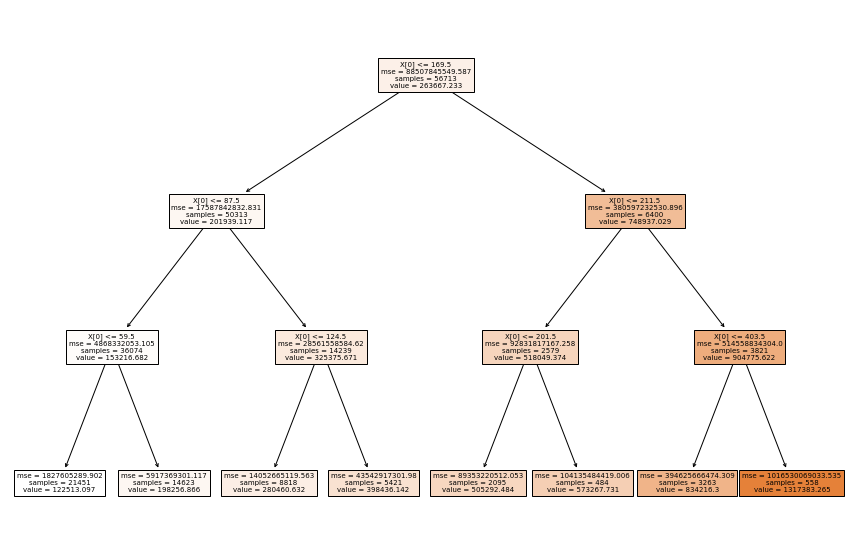

In [333]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (15,10))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()
    
#Se observa como modelo de árbol de regresión divide los datos

In [334]:
#Métrica de evaluación

#Se elige la raíz del error cuadrático medio, RMSE
#Representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado
#Mide la cantidad de error que hay entre dos conjuntos de datos
#los conjuntos de datos son:
# -train (70% del total de los datos)
# -test (30% del total de los datos)
#RMSE es una pedida de precisión en cuanto a como el modelo elige la respuesta

#¿Que buscamos con los valores de RMSE?

#Los valores más bajos de RMSE indican un mejor ajuste del modelo
#Cuanto más pequeño es un valor RMSE, más cercanos son los valores predichos y observados
#El modelo es más preciso cuando los conjuntos de datos train y test, son cercanos en su valor, similares
#(cuando la diferencia es más cercana a cero)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 216861.79306903091
Raíz del error cuadrático medio en Test: 218633.410892772


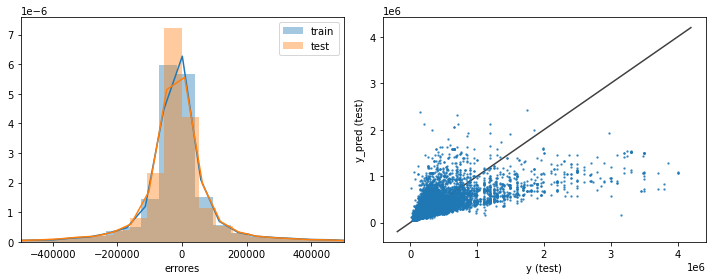

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 213213.8027447749
Raíz del error cuadrático medio en Test: 216939.535641816


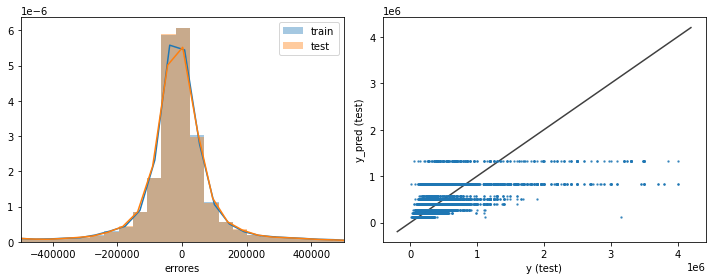

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 196038.14265990336
Raíz del error cuadrático medio en Test: 214331.4120497579


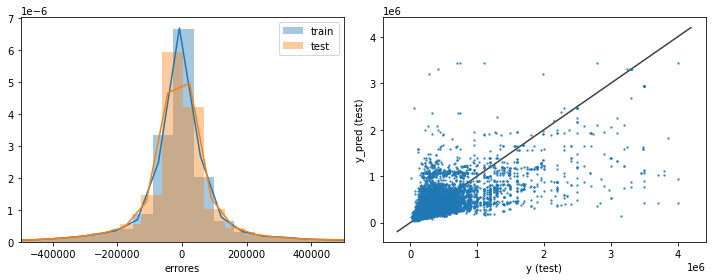

In [335]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 100, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 100, label = 'test')
    plt.xlim(-500000, 500000)
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test, y_test_pred, alpha = 0.7 ,s = 2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [336]:
#¿Que modelo entrenado elegir?

#Modelo Regresión Lineal
#La diferencia entre el RMSE de la muestra train y la muestra test, es la menor
#El modelo es más preciso al hacer la regresión
#Se podría generalizar con más facilidad, en comparación a los otros 2 modelos, para este caso (Árbol de decisión y KNN)

In [337]:
#MODELO 2 PROYECTO
#Regresión Multivariada, se incluyen todas las variables de control
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth = 3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors = 2)

In [338]:
#Se define variable X
X = data_properati_final[['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms']]
X.columns

Index(['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms'], dtype='object')

In [340]:
#Se define variable y
y = data_properati_final['price']
y

0          153000.0
1          159000.0
2          125000.0
3          295000.0
5          150000.0
            ...    
146554     570000.0
146555     480000.0
146556     530000.0
146557     420000.0
146558    1470000.0
Name: price, Length: 81019, dtype: float64

In [341]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [342]:
#Se entrenan los modelos

linear_model.fit(X_train, y_train)  #Betas de linear_model
tree_regressor.fit(X_train, y_train) #Como se dividen los datos en el tree_regressor
knn_regressor.fit(X_train, y_train) #Mapeo datos en el knn

KNeighborsRegressor(n_neighbors=2)

In [343]:
print(linear_model.coef_, linear_model.intercept_) #Betas de regresión lineal

[ 2.08869346e+03  9.06313765e+01  1.32135227e+05 -6.46339344e+04
  1.29398617e+04] -58069.8201135734


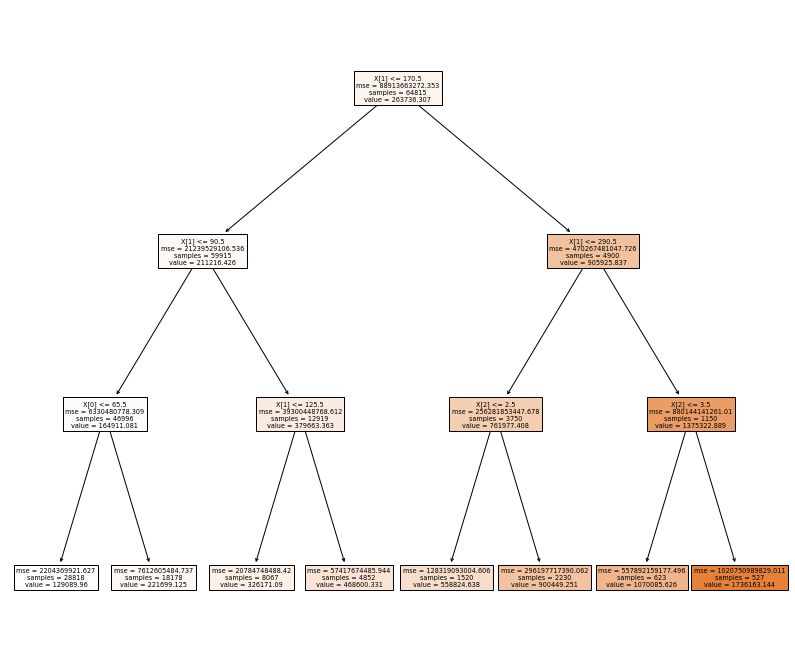

In [344]:
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (14,12))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199315.87121054775
Raíz del error cuadrático medio en Test: 203269.83120125544


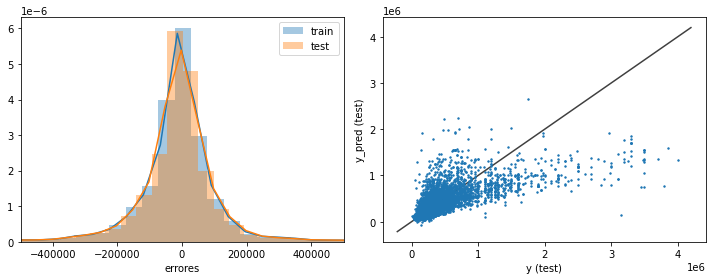

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191995.85978715765
Raíz del error cuadrático medio en Test: 195297.34650761852


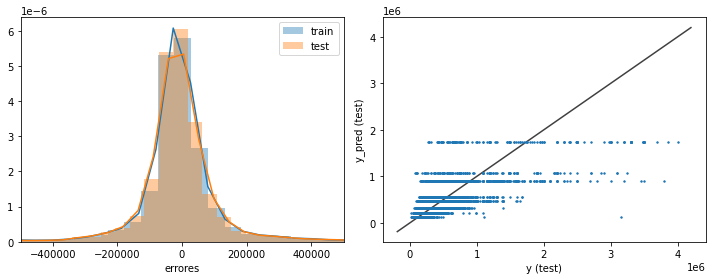

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 90455.37050434273
Raíz del error cuadrático medio en Test: 144557.3117714964


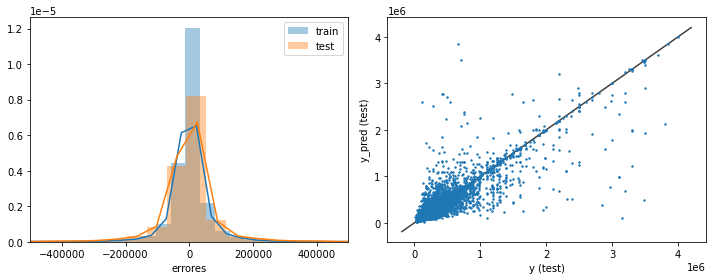

In [345]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 100, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 100, label = 'test')
    plt.xlim(-500000, 500000)
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [346]:
#¿Que modelo entrenado elegir?

#Modelo Árbol de Decisión
#La diferencia entre el RMSE de la muestra train y la muestra test, es la menor
#El modelo es más preciso al hacer la regresión
#Se podría generalizar con más facilidad, en comparación a los otros 2 modelos, para este caso (Regresión lineal y KNN)

In [347]:
#¿Qué información podría faltar en el modelo?

# -Segmento (Estrato socioeconómico)
# -Servicios comunales (ej: piscina, canchas de fútbol, parques)
# -Acabados (ej: cocina con marmol, horno electrico)
# -Tipo de propiedad (Penthouse, departamento con terraza, casa)
# -Distancia a centros de trabajo
# -Acceso a transporte público
#Hacen falta varibles que midan la calidad del entorno de cada inmueble
#La variable segmento es importante para definir el precio del inmueble
#ya que barrios donde el ingreso promedio sea más alto, probablemente, el precio del inmueble tambien lo sea

#¿Qué variables pueden estar midiendo lo mismo?

#Las variables de espacio miden casi lo mismo y en modelos de MCO podrían causar problemas de multicolinealidad
#surface_total tiene informacion de surface_covered
#si aumenta una, la otra tambien lo hará
#por el lado de bedrooms y rooms ocurre lo mismo
#si aumenta bedrooms, rooms tambien lo hará
#Estas variables miden tamaño y espacio del inmueble de forma repedita

In [348]:
#Se crea un MODELO 3 y un MODELO 4 con enfoque diferente
#Ahora se busca crear un modelo que pueda clasificar la muestra en los tipos de propiedad

In [5]:
#KNN MODELO 3
#Definir X, y
X = data_properati_final[['surface_total', 'surface_covered', 'bathrooms']]
X.columns

Index(['surface_total', 'surface_covered', 'bathrooms'], dtype='object')

In [6]:
#La variable salida ahora es property_type 
y = data_properati_final['property_type']
y

0         Departamento
1                   PH
2                   PH
3                   PH
5                   PH
              ...     
146554              PH
146555              PH
146556              PH
146557    Departamento
146558    Departamento
Name: property_type, Length: 81019, dtype: object

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30, p=2)

In [8]:
#Entrenar el modelo
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [9]:
#Predecir
y_hat = neigh.predict(X)

In [10]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 1
clf_knn = KNeighborsClassifier(n_neighbors = n_neighbors)

In [12]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print("Porcentaje de aciertos set entrenamiento:", train_acc)
print("Porcentaje de aciertos set test:", test_acc)

Porcentaje de aciertos set entrenamiento: 0.9019801456456191
Porcentaje de aciertos set test: 0.8560437751995392


In [16]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train_pred, y_train)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test_pred, y_test)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

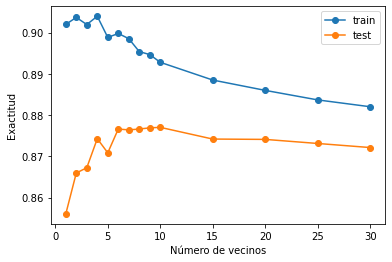

In [17]:
plt.plot(k_vecinos, lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Exactitud")

In [18]:
#Árbol MODELO 4

#Definir X, y
X = data_properati_final[['surface_total', 'surface_covered', 'bathrooms']]
X.columns

Index(['surface_total', 'surface_covered', 'bathrooms'], dtype='object')

In [19]:
y = data_properati_final['property_type']
y

0         Departamento
1                   PH
2                   PH
3                   PH
5                   PH
              ...     
146554              PH
146555              PH
146556              PH
146557    Departamento
146558    Departamento
Name: property_type, Length: 81019, dtype: object

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [21]:
### Entrenar el modelo
tree.fit(X, y)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [22]:
### Predecir
y_hat = tree.predict(X)

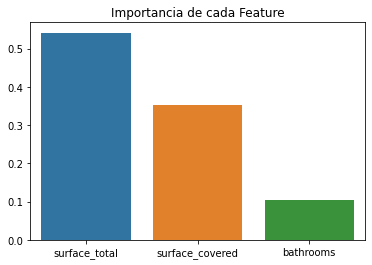

In [23]:
### Evaluar
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

In [24]:
#Train test split

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
clf_tree.fit(X_train, y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print("Porcentaje de aciertos set entrenamiento:", train_acc)
print("Porcentaje de aciertos set test:", test_acc)

Porcentaje de aciertos set entrenamiento: 0.9068467547123235
Porcentaje de aciertos set test: 0.8844729696371266


In [28]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train_pred, y_train)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test_pred, y_test)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

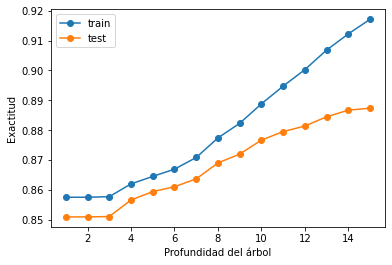

In [29]:
plt.plot(max_depths, lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths, lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel("Profundidad del árbol")
plt.ylabel("Exactitud")

In [30]:
#Árbol con 30 niveles de profundidad
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 30, random_state = 42)

In [31]:
clf_tree.fit(X_train, y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [32]:
train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print("Porcentaje de aciertos set entrenamiento:", train_acc)
print("Porcentaje de aciertos set test:", test_acc)

Porcentaje de aciertos set entrenamiento: 0.9361698376033714
Porcentaje de aciertos set test: 0.8918785485065416
